<a href="https://colab.research.google.com/github/jazmanqs03-bit/Portofolio-Collabs-Jazman/blob/main/Analisa%20Reservoir%20Log%20dan%20analisa/Tugas_Analisa_Data_Jazman_Qairawan_Shalihin_27259044.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selamat Datang di Colab!
# Analisa ini mendeskripsikan Nilai reservoir

In [ ]:
#Import data facies_data 2.csv
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving facies_data2.csv to facies_data2.csv
User uploaded file "facies_data2.csv" with length 196104 bytes


In [106]:
#Singkat panggilan code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.ticker as ticker

In [ ]:
data = pd.read_csv('facies_data2.csv')
data.head(15)


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787


In [ ]:
data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [117]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import PercentFormatter
import numpy as np

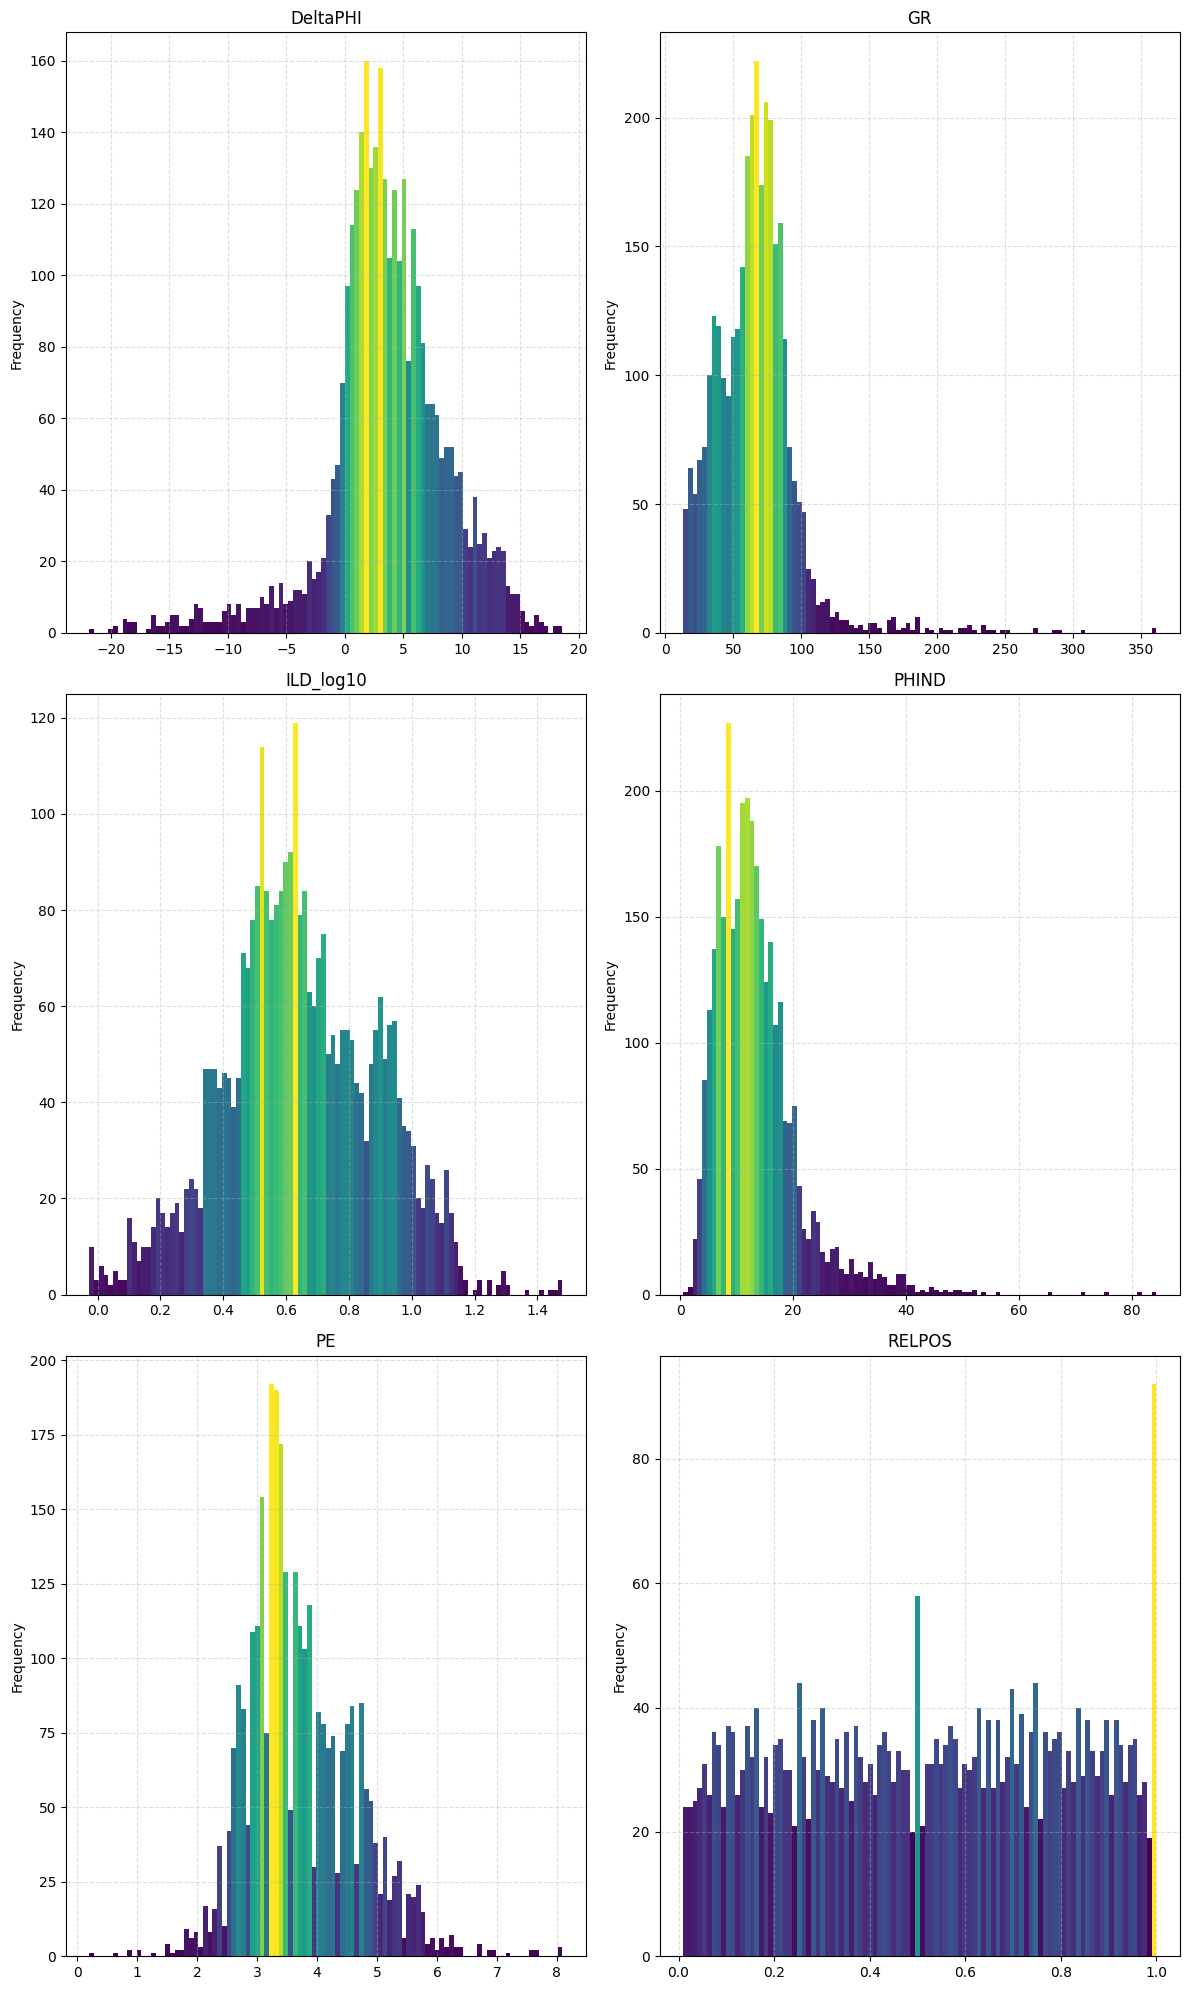

In [136]:
#Plot data dan warna
cols = ['DeltaPHI','GR','ILD_log10','PHIND','PE','RELPOS']
n_bins = 100
#Menentukan layout subplot (jumlah kolom)
n_cols = 2
#Menghitung jumlah baris otomatis
n_rows = int(np.ceil(len(cols) / n_cols))
#Membuat figure dan axes subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 20))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    dist1 = data[col].dropna()

    # === HISTOGRAM SESUAI PANDUAN MATPLOTLIB ===
    N, bins, patches = ax.hist(dist1, bins=n_bins)

    # Color code by height
    fracs = N / N.max()

    # Normalize to [0,1]
    norm = colors.Normalize(fracs.min(), fracs.max())

    # Apply color to each bin
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

    ax.set_title(col)
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

** DESKRIPSIKAN **
1. DELTAPHI :    
menunjukkan distribusi yang mendekati normal dengan puncak utama di sekitar nilai nol hingga positif kecil. Hal ini mengindikasikan bahwa sebagian besar interval memiliki perbedaan densitas–neutron yang kecil, yang umumnya berkaitan dengan batuan reservoir yang relatif bersih. Keberadaan ekor ke arah nilai negatif menunjukkan adanya interval dengan efek gas atau pemisahan neutron–density yang signifikan, sedangkan ekor positif mencerminkan zona dengan porositas efektif yang lebih baik. Warna terang pada bagian tengah histogram menegaskan bahwa nilai DeltaPHI kecil hingga positif merupakan kondisi yang paling sering dijumpai.
2. GAMMA RAY :    
memperlihatkan distribusi yang tidak simetris dan cenderung condong ke kanan (right-skewed). Mayoritas data terkonsentrasi pada nilai GR menengah, yang ditunjukkan oleh batang dengan warna terang, menandakan dominasi litologi shaly sand atau batuan campuran. Nilai GR yang sangat tinggi muncul sebagai ekor dengan warna lebih gelap, mencerminkan interval shale murni yang relatif lebih jarang. Pola ini menegaskan heterogenitas litologi dalam interval yang dianalisis.
3. ILD_LOG10 / RESISTIVTY :    
menunjukkan distribusi yang lebih kompleks dengan indikasi beberapa puncak (multimodal). Hal ini mengisyaratkan keberadaan lebih dari satu populasi resistivitas, yang umumnya berkaitan dengan variasi fluida pengisi pori, seperti zona berair dan zona berpotensi hidrokarbon. Perbedaan warna yang muncul pada beberapa puncak menandakan bahwa tidak terdapat satu nilai resistivitas dominan tunggal, sehingga interpretasi fluida memerlukan pendekatan lanjutan seperti clustering atau machine learning.
4. PHIND / POROSITY :    
menunjukkan distribusi yang lebih kompleks dengan indikasi beberapa puncak (multimodal). Hal ini mengisyaratkan keberadaan lebih dari satu populasi resistivitas, yang umumnya berkaitan dengan variasi fluida pengisi pori, seperti zona berair dan zona berpotensi hidrokarbon. Perbedaan warna yang muncul pada beberapa puncak menandakan bahwa tidak terdapat satu nilai resistivitas dominan tunggal, sehingga interpretasi fluida memerlukan pendekatan lanjutan seperti clustering atau machine learning.
5. PE / PHOTOELECTROLIC EFFECT
menunjukkan distribusi yang condong ke kanan dengan konsentrasi utama pada nilai porositas menengah. Interval ini ditandai dengan warna yang lebih terang, menunjukkan bahwa porositas menengah merupakan kondisi yang paling umum dan berkontribusi besar terhadap kualitas reservoir. Nilai porositas yang sangat tinggi muncul sebagai ekor dengan warna lebih gelap, menandakan kejadian yang lebih jarang dan bersifat lokal, misalnya pada zona channel atau batuan yang kurang terkonsolidasi.
6. RELPOS :     
memperlihatkan distribusi yang relatif seragam di sepanjang rentang nilainya. Tidak adanya satu puncak dominan yang sangat menonjol menunjukkan bahwa data mencakup seluruh posisi relatif dalam siklus stratigrafi secara seimbang. Warna yang relatif homogen antar bin memperkuat interpretasi bahwa tidak terdapat bias data terhadap bagian tertentu dari urutan stratigrafi.

<Axes: >

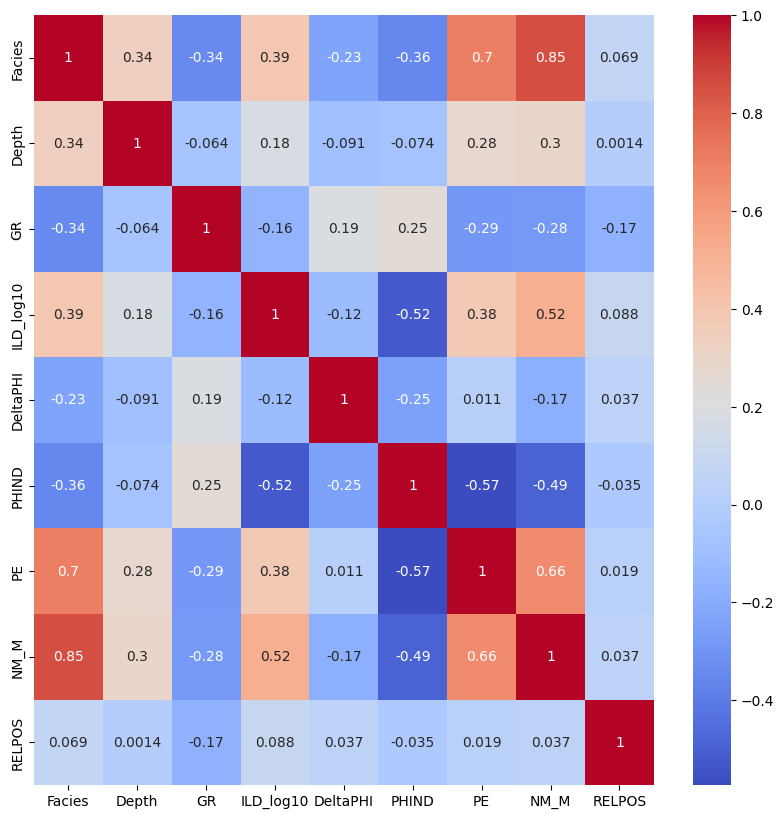

In [ ]:
# Plot Heatmap
data2 =data.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(data2, cmap='coolwarm', annot=True)

** DESKRPISIKAN **
1. heatmap ini menunjukkan bahwa Facies paling kuat dikontrol oleh kombinasi lingkungan pengendapan (NM_M), mineralogi (PE), porositas (PHIND), dan resistivitas (ILD_log10). Parameter-parameter ini sangat relevan sebagai fitur utama dalam analisis clustering dan machine learning. Sebaliknya, Depth dan RELPOS lebih berperan sebagai parameter pendukung stratigrafi daripada pembeda utama sifat batuan. Visualisasi ini menegaskan konsistensi hubungan petrofisika klasik sekaligus memberikan dasar yang kuat untuk pemodelan fasies berbasis data.

In [134]:
import pandas as pd
data = pd.read_csv('facies_data2.csv')
data = data.sort_values("Depth").reset_index(drop=True)

depth = data["Depth"]
GR = data["GR"]
ILD_log10 = data["ILD_log10"]
DeltaPHI = data["DeltaPHI"]
PHIND = data["PHIND"]
PE = data["PE"]
RELPOS = data["RELPOS"]

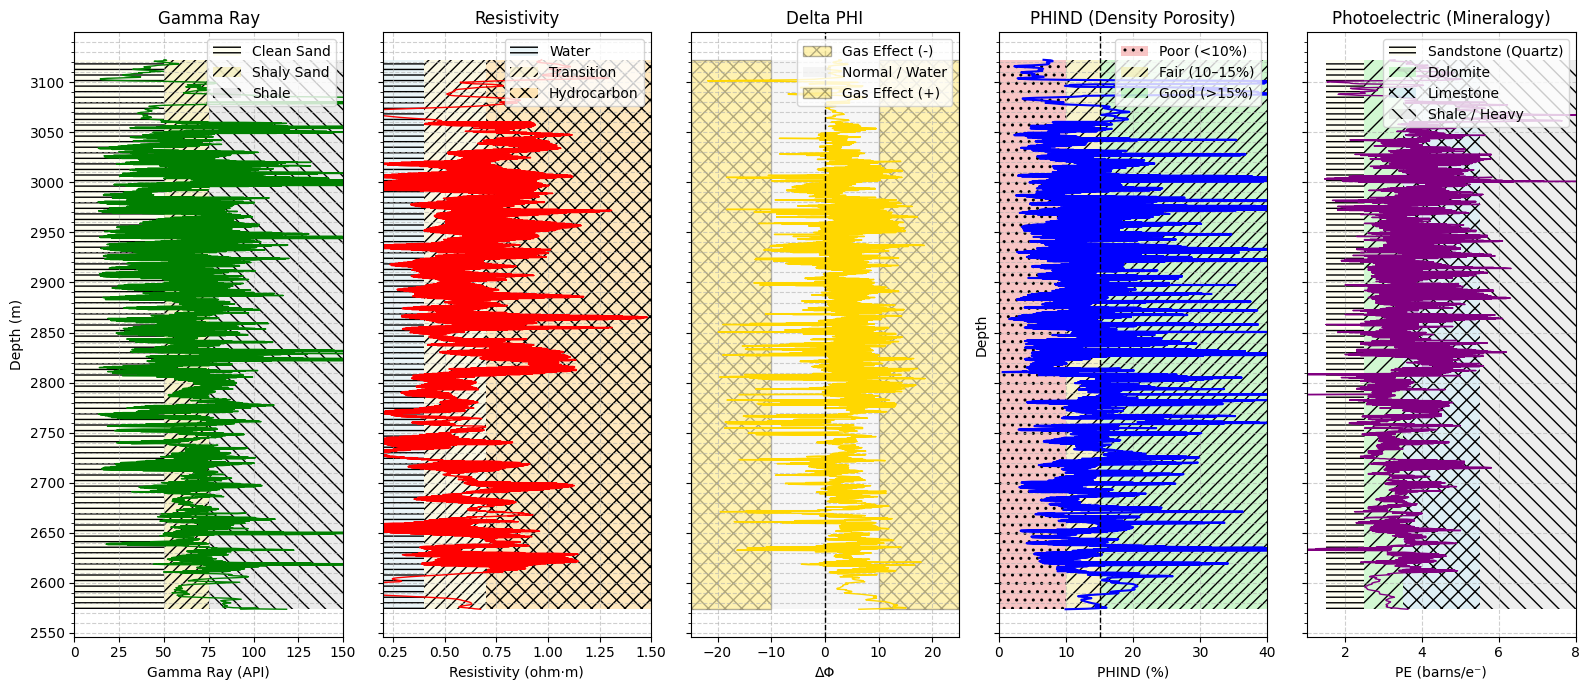

In [143]:
# =================================================
# MEMBUAT 1 GROUP DENGAN 5 TRACK LOG
# =================================================
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(
    1, 5, figsize=(16, 7), sharey=True)
# =================================================
# TRACK 1 – GAMMA RAY
# =================================================
ax1.plot(GR, depth, color='green', linewidth=1)
ax1.invert_yaxis()
ax1.set_title('Gamma Ray')
ax1.set_xlabel('Gamma Ray (API)')
ax1.set_ylabel('Depth (m)')
ax1.set_xlim(0, 150)

# RECTANGLE LITHOLOGY
ax1.add_patch(Rectangle(
    (0, depth.min()), 50, depth.max() - depth.min(),
    facecolor='lightyellow', alpha=0.45, hatch='---', label='Clean Sand'
))
ax1.add_patch(Rectangle(
    (50, depth.min()), 25, depth.max() - depth.min(),
    facecolor='khaki', alpha=0.45, hatch='///', label='Shaly Sand'
))
ax1.add_patch(Rectangle(
    (75, depth.min()), 150, depth.max() - depth.min(),
    facecolor='lightgray', alpha=0.45, hatch='\\\\', label='Shale'
))

ax1.grid(True, which='both', linestyle='--', alpha=0.6)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax1.legend(loc='upper right')

# =================================================
# TRACK 2 – RESISTIVITY
# =================================================
ax2.plot(ILD_log10, depth, color='red', linewidth=1)

ax2.set_title('Resistivity')
ax2.set_xlabel('Resistivity (ohm·m)')
ax2.set_xlim(0.2, 1.5)

# RECTANGLE FLUID ZONE
ax2.add_patch(Rectangle(
    (0.0, depth.min()), 0.4, depth.max() - depth.min(),
    facecolor='lightblue', alpha=0.25, hatch='---', label='Water'
))
ax2.add_patch(Rectangle(
    (0.4, depth.min()), 0.3, depth.max() - depth.min(),
    facecolor='khaki', alpha=0.25, hatch='///', label='Transition'
))
ax2.add_patch(Rectangle(
    (0.7, depth.min()), 1.5, depth.max() - depth.min(),
    facecolor='orange', alpha=0.25, hatch='xx', label='Hydrocarbon'
))

ax2.axvline(10, color='black', linestyle='--', linewidth=1)
ax2.grid(True, which='both', linestyle='--', alpha=0.6)
ax2.legend(loc='upper right')

# =================================================
# TRACK 3 – DELTA PHI
# =================================================
ax3.plot(DeltaPHI, depth, color='gold', linewidth=1)

ax3.set_title('Delta PHI')
ax3.set_xlabel('ΔΦ')
ax3.set_xlim(-25, 25)

ax3.axvline(0, color='black', linestyle='--', linewidth=1)

# Gas Effect (-)
ax3.add_patch(Rectangle(
    (-25, depth.min()), 15,
    depth.max() - depth.min(),
    facecolor='gold',
    alpha=0.30,
    hatch='xx',
    edgecolor='black',
    label='Gas Effect (-)',
    zorder=1
))

# Normal / No Gas (CENTER)
ax3.add_patch(Rectangle(
    (-10, depth.min()), 20,
    depth.max() - depth.min(),
    facecolor='lightgrey',
    alpha=0.20,
    label='Normal / Water',
    zorder=1
))

# Gas Effect (+)
ax3.add_patch(Rectangle(
    (10, depth.min()), 15,
    depth.max() - depth.min(),
    facecolor='gold',
    alpha=0.30,
    hatch='xx',
    edgecolor='black',
    label='Gas Effect (+)',
    zorder=1
))
ax3.grid(True, which='both', linestyle='--', alpha=0.6)
ax3.legend(loc='upper right')

# =================================================
# TRACK 4 – PHIND
# =================================================
ax4.plot(PHIND * 100, depth, color='blue', linewidth=1)

ax4.plot(PHIND, depth, color='Blue')
ax4.invert_yaxis()
ax4.set_title('PHIND')
ax4.set_xlabel('PHIND')
ax4.set_ylabel('Depth')

ax4.set_title('PHIND (Density Porosity)')
ax4.set_xlabel('PHIND (%)')
ax4.set_xlim(0, 40)

# RECTANGLE POROSITY QUALITY
ax4.add_patch(Rectangle(
    (0, depth.min()), 10, depth.max() - depth.min(),
    facecolor='lightcoral', alpha=0.45, hatch='..', label='Poor (<10%)'
))
ax4.add_patch(Rectangle(
    (10, depth.min()), 5, depth.max() - depth.min(),
    facecolor='khaki', alpha=0.45, hatch='//', label='Fair (10–15%)'
))
ax4.add_patch(Rectangle(
    (15, depth.min()), 40, depth.max() - depth.min(),
    facecolor='lightgreen', alpha=0.45, hatch='///', label='Good (>15%)'
))

ax4.axvline(15, color='black', linestyle='--', linewidth=1)
ax4.grid(True, which='both', linestyle='--', alpha=0.6)
ax4.legend(loc='upper right')

# =================================================
# TRACK 5 – PHOTOELECTRIC (MINERALOGY)
# =================================================
ax5.plot(PE, depth, color='purple', linewidth=1)
ax5.set_title('Photoelectric (Mineralogy)')
ax5.set_xlabel('PE (barns/e⁻)')
ax5.set_xlim(1, 8)

# Mineralogy Zones
ax5.add_patch(Rectangle((1.5, depth.min()), 1.0, depth.max()-depth.min(),
                        facecolor='lightyellow', alpha=0.4, hatch='---', label='Sandstone (Quartz)'))
ax5.add_patch(Rectangle((2.5, depth.min()), 1.0, depth.max()-depth.min(),
                        facecolor='lightgreen', alpha=0.4, hatch='//', label='Dolomite'))
ax5.add_patch(Rectangle((3.5, depth.min()), 2.0, depth.max()-depth.min(),
                        facecolor='lightblue', alpha=0.4, hatch='xx', label='Limestone'))
ax5.add_patch(Rectangle((5.5, depth.min()), 3.0, depth.max()-depth.min(),
                        facecolor='lightgray', alpha=0.4, hatch='\\\\', label='Shale / Heavy'))

ax5.grid(True, linestyle='--', alpha=0.6)
ax5.legend(loc='upper right')

# =================================================
# FINAL LAYOUT
# =================================================
plt.tight_layout()
plt.show()

**Intepretasi dari Pembacaan Log**
1. Gammaray Log :  
Nilai GR rendah–menengah mendominasi beberapa interval, menunjukkan pasir bersih hingga shaly sand.dan terdapat GR dengan interval tinggi menunjukan bahwa ada potensial yang terselingi shale
2. Resistivty :    
Resistivitas tinggi menunjukkan kejenuhan hidrokarbon, sedangkan resistivitas rendah mengindikasikan zona jenuh air. Beberapa interval pasir menunjukkan indikasi hidrokarbon.
3. Delta PHI :     
Kondisi ini merupakan indikator kuat keberadaan gas, terutama saat berasosiasi dengan resistivitas tinggi.
4. PHIND :    
Nilai PHIND >15% mendominasi interval pasir, menunjukkan porositas baik.
5. PE :    
Secara grafik mineralogi meununjuk kepada dolomite dan lime stone di sesuaikan dengan depth

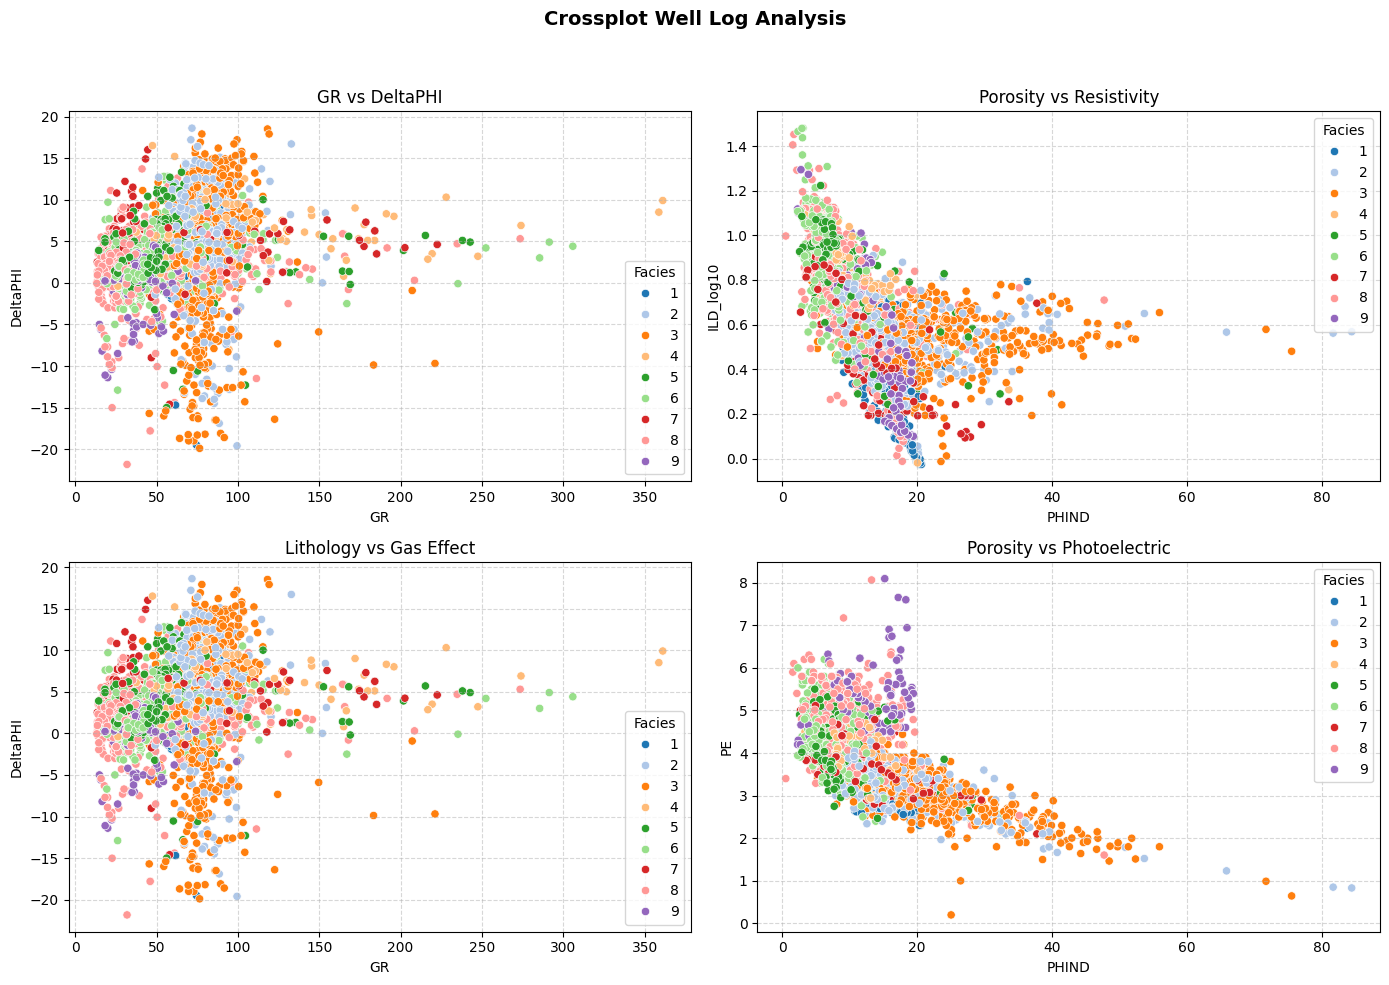

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,2,A1 SH,CROSS H CATTLE,2573.5,118.439,0.674494,6.3,9.95,3.631,1,1.000
1,2,A1 SH,CROSS H CATTLE,2574.0,92.550,0.645226,9.9,13.05,3.450,1,0.987
2,2,A1 SH,CROSS H CATTLE,2574.5,102.168,0.630021,12.0,14.50,3.364,1,0.974
3,2,A1 SH,CROSS H CATTLE,2575.0,88.898,0.600319,15.1,16.05,3.187,1,0.961
4,2,A1 SH,CROSS H CATTLE,2575.5,85.493,0.578639,13.6,15.90,3.099,1,0.947


In [144]:
# MEMBUAT SATU FIGURE DENGAN 4 CROSS PLOT LOG
# =================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Crossplot Well Log Analysis', fontsize=14, fontweight='bold')

# =================================================
# KODE 1 – GR vs DeltaPHI
# =================================================
sns.scatterplot(data=data,x=GR,y=DeltaPHI,hue='Facies',palette='tab20',ax=axes[0, 0])
axes[0, 0].set_title('GR vs DeltaPHI')
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# =================================================
# KODE 2 – POROSITY vs RESISTIVITY
# =================================================
sns.scatterplot(data=data,x=PHIND,y=ILD_log10,hue='Facies',palette='tab20',ax=axes[0, 1])
axes[0, 1].set_title('Porosity vs Resistivity')
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

# =================================================
# KODE 3 – LITHOLOGY vs GAS EFFECT
# (secara data sama dengan Kode 1, hanya judul berbeda)
# =================================================
sns.scatterplot(data=data,x=GR,y=DeltaPHI,hue='Facies',palette='tab20',ax=axes[1, 0])
axes[1, 0].set_title('Lithology vs Gas Effect')
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# =================================================
# KODE 4 – POROSITY vs PHOTOELECTRIC
# =================================================
sns.scatterplot(data=data,x=PHIND,y=PE,hue='Facies',palette='tab20',ax=axes[1, 1])
axes[1, 1].set_title('Porosity vs Photoelectric')
axes[1, 1].grid(True, linestyle='--', alpha=0.5)

# =================================================
# FINAL LAYOUT
# =================================================
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Optional: cek data
data.head()

**DESKRIPSI CROSSPLOT LOG**
1. GR VS DELTHA PHI :
GR rendah → batuan pasir (reservoir).
Delta PHI besar (positif/negatif) → indikasi gas (neutron–density crossover).
GR tinggi (>120 API) → shale → non-reservoir.
2. POROSITY VS RESISTVTY :
PHIND tinggi + Rt tinggi → reservoir hidrokarbon (pay zone).
PHIND tinggi + Rt rendah → water sand.
PHIND rendah → batuan kompak / shale.   
3. LITHOLOGY VS GAS EFFECT :     
Gas effect hanya signifikan pada batuan pasir.
Pada shale, meskipun Delta PHI bervariasi, tidak dianggap indikasi gas reservoir.
4. PHOTOELECTROLIC VS POROSITY :    
PE rendah → sandstone/quartz-rich.
PE tinggi (>4) → shale atau karbonat.
Porositas tinggi + PE rendah → reservoir pasir berkualitas baik.


In [61]:
display(data.head(9))

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,2,A1 SH,CROSS H CATTLE,2573.5,118.439,0.674494,6.3,9.95,3.631,1,1.000
1,2,A1 SH,CROSS H CATTLE,2574.0,92.550,0.645226,9.9,13.05,3.450,1,0.987
2,2,A1 SH,CROSS H CATTLE,2574.5,102.168,0.630021,12.0,14.50,3.364,1,0.974
3,2,A1 SH,CROSS H CATTLE,2575.0,88.898,0.600319,15.1,16.05,3.187,1,0.961
4,2,A1 SH,CROSS H CATTLE,2575.5,85.493,0.578639,13.6,15.90,3.099,1,0.947
5,2,A1 SH,CROSS H CATTLE,2576.0,82.802,0.569959,13.0,14.90,3.069,1,0.934
6,2,A1 SH,CROSS H CATTLE,2576.5,84.257,0.576457,12.7,14.35,3.077,1,0.921
7,2,A1 SH,CROSS H CATTLE,2577.0,85.349,0.592732,12.8,14.70,3.101,1,0.908
8,2,A1 SH,CROSS H CATTLE,2577.5,84.317,0.610660,13.5,15.15,3.078,1,0.895


ML MODEL

In [148]:
import pandas as pd

# Re-load the data from the original CSV to ensure all columns, including 'Facies', are present.
data = pd.read_csv('facies_data2.csv')
data = data.sort_values("Depth").reset_index(drop=True)

# Define the features for clustering
Feature = ['GR','ILD_log10','DeltaPHI','PHIND','PE']

# Filter data to include only the features, Depth, and the original Facies column, then drop NaN values.
data = data[Feature + ['Depth', 'Facies']].dropna()

# X will be the feature set for clustering
X = data[Feature]

data.head(9)

,GR,ILD_log10,DeltaPHI,PHIND,PE,Depth,Facies
0,118.439,0.674494,6.3,9.95,3.631,2573.5,2
1,92.550,0.645226,9.9,13.05,3.450,2574.0,2
2,102.168,0.630021,12.0,14.50,3.364,2574.5,2
3,88.898,0.600319,15.1,16.05,3.187,2575.0,2
4,85.493,0.578639,13.6,15.90,3.099,2575.5,2
5,82.802,0.569959,13.0,14.90,3.069,2576.0,2
6,84.257,0.576457,12.7,14.35,3.077,2576.5,2
7,85.349,0.592732,12.8,14.70,3.101,2577.0,2
8,84.317,0.610660,13.5,15.15,3.078,2577.5,2


In [149]:
#Preprocessing - Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [151]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Re-load the data from the original CSV to ensure all columns, including 'Facies', are present.
data = pd.read_csv('facies_data2.csv')
data = data.sort_values("Depth").reset_index(drop=True)

# Define the features for clustering
Feature = ['GR','ILD_log10','DeltaPHI','PHIND','PE']

# Filter data to include only the features, Depth, and the original Facies column, then drop NaN values.
data = data[Feature + ['Depth', 'Facies']].dropna()

# X will be the feature set for clustering
X = data[Feature]

# Preprocessing - Standardization
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

n_rocktype = 4 #jumlah Klasifikasi yg kita inginkan

#KMeans
from sklearn.cluster import KMeans
KMeans=KMeans(n_clusters=n_rocktype, random_state=42, n_init=20)
label_KMeans = KMeans.fit_predict (X_standard)
data['Kmeans'] =label_KMeans

#GM
from sklearn.mixture import GaussianMixture
GaussianMixture = GaussianMixture(n_components=n_rocktype,covariance_type='full', random_state=42)
label_GM = GaussianMixture.fit_predict (X_standard)
data['GM']=label_GM

#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering # Changed import
AC_model = AgglomerativeClustering(n_clusters=n_rocktype, linkage="ward") # Using AgglomerativeClustering
label_AC = AC_model.fit_predict(X_standard)
data['AC'] = label_AC


data.head(9)

,GR,ILD_log10,DeltaPHI,PHIND,PE,Depth,Facies,Kmeans,GM,AC
0,118.439,0.674494,6.3,9.95,3.631,2573.5,2,1,3,1
1,92.550,0.645226,9.9,13.05,3.450,2574.0,2,1,1,1
2,102.168,0.630021,12.0,14.50,3.364,2574.5,2,1,1,1
3,88.898,0.600319,15.1,16.05,3.187,2575.0,2,1,1,1
4,85.493,0.578639,13.6,15.90,3.099,2575.5,2,1,1,1
5,82.802,0.569959,13.0,14.90,3.069,2576.0,2,1,1,1
6,84.257,0.576457,12.7,14.35,3.077,2576.5,2,1,1,1
7,85.349,0.592732,12.8,14.70,3.101,2577.0,2,1,1,1
8,84.317,0.610660,13.5,15.15,3.078,2577.5,2,1,1,1


In [68]:
#ML Evaluation
from sklearn.metrics import silhouette_score

SL_Kmeans = silhouette_score(X_standard, label_KMeans)
SL_GM = silhouette_score(X_standard, label_GM)
SL_AC = silhouette_score(X_standard, label_AC)

results = pd.DataFrame({
"Model": ["Kmeans", "GM", "AC"],
"Silhouette": [SL_Kmeans, SL_GM, SL_AC]
})
print(results)

    Model  Silhouette
0  Kmeans    0.346520
1      GM    0.277167
2      AC    0.322445


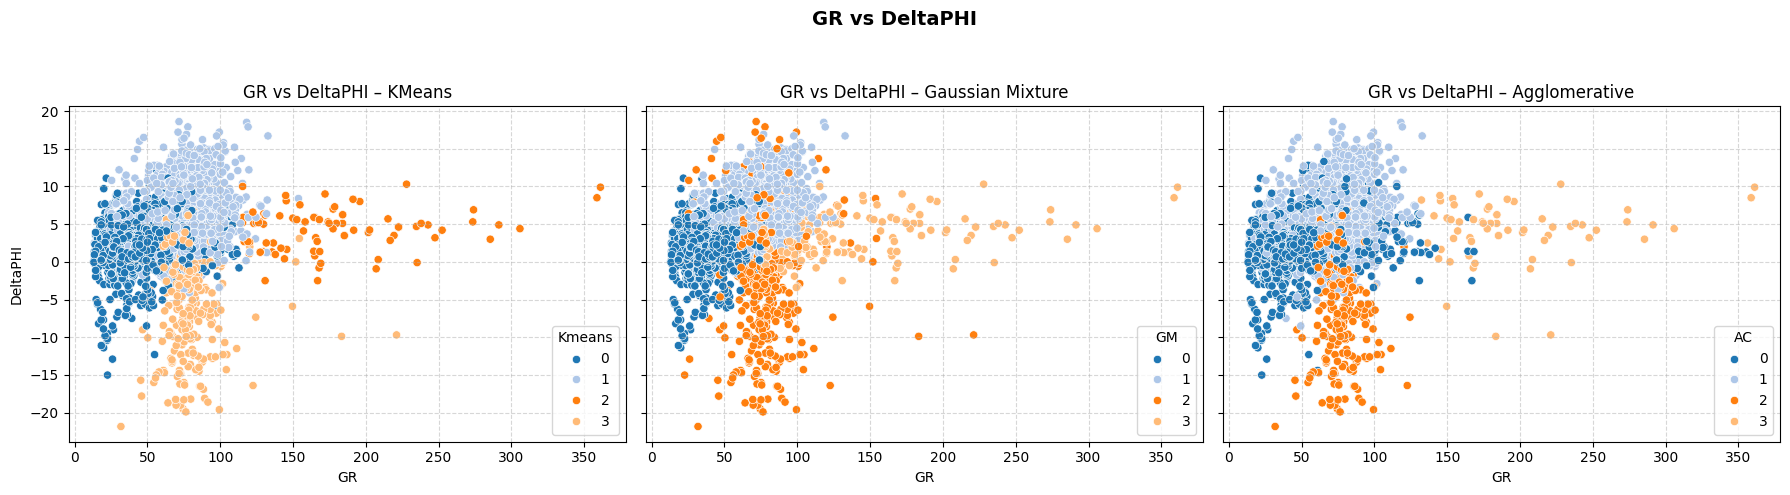

In [104]:
# =================================================
# CREATE ONE FIGURE WITH 3 SUBPLOTS
# =================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('GR vs DeltaPHI', fontsize=14, fontweight='bold')

# =================================================
# KODE 1 – KMEANS
# =================================================
sns.scatterplot(data=data,x=GR,y=DeltaPHI,palette="tab20",hue=data['Kmeans'],ax=axes[0])
axes[0].set_title('GR vs DeltaPHI – KMeans')
axes[0].set_xlabel('GR')
axes[0].set_ylabel('DeltaPHI')
axes[0].grid(True, linestyle='--', alpha=0.5)

# =================================================
# KODE 2 – GAUSSIAN MIXTURE
# =================================================
sns.scatterplot(data=data,x=GR,y=DeltaPHI,palette="tab20",hue=data['GM'],ax=axes[1])
axes[1].set_title('GR vs DeltaPHI – Gaussian Mixture')
axes[1].set_xlabel('GR')
axes[1].grid(True, linestyle='--', alpha=0.5)

# =================================================
# KODE 3 – AGGLOMERATIVE CLUSTERING
# =================================================
sns.scatterplot(data=data,x=GR,y=DeltaPHI,palette="tab20",hue=data['AC'],ax=axes[2])
axes[2].set_title('GR vs DeltaPHI – Agglomerative')
axes[2].set_xlabel('GR')
axes[2].grid(True, linestyle='--', alpha=0.5)

# =================================================
# FINAL LAYOUT
# =================================================
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


Hasil analisa dari ketiga ML yaitu Kmeans, GM dan AC

1. K-Means (GR vs DeltaPHI)

Karakteristik:
K-Means menghasilkan pemisahan cluster yang tegas dan jelas berdasarkan jarak ke centroid. Pembagian data terlihat geometris dan relatif kaku.

Interpretasi:
Cluster dengan GR rendah dan DeltaPHI mendekati nol hingga positif diinterpretasikan sebagai zona reservoir bersih (pasir) dengan porositas efektif, sementara cluster dengan GR tinggi merepresentasikan zona shale. Meskipun visualnya jelas, K-Means cenderung menyederhanakan heterogenitas dan kurang menangkap zona transisi litologi

2. Gaussian Mixture Model (GMM) (GR vs DeltaPHI)

Karakteristik:
GMM menghasilkan clustering probabilistik dengan batas antar cluster yang lebih halus dan saling tumpang tindih.

Interpretasi:
Model ini lebih mampu merepresentasikan overlap alami pada data GR–DeltaPHI. Cluster dengan GR menengah dan DeltaPHI positif teridentifikasi sebagai zona reservoir potensial, mencerminkan kondisi geologi yang lebih realistis. GMM paling sesuai untuk data petrofisika yang kontinu dan kompleks.

3. Agglomerative Clustering (GR vs DeltaPHI)

Karakteristik:
Agglomerative Clustering membentuk cluster secara hierarkis, tergantung pada tingkat pemotongan dendrogram.

Interpretasi:
Metode ini menggambarkan transisi litologi secara bertahap, namun hasilnya sangat bergantung pada jumlah cluster yang dipilih, sehingga memerlukan kalibrasi geologis untuk menghindari subjektivitas.

Kesimpulan :    
Kesimpulan

K-Means: Paling mudah dipahami secara visual dan cocok untuk eksplorasi awal, tetapi kurang merepresentasikan heterogenitas dan overlap fasies.

GMM: Paling representatif secara petrofisika karena mampu menangkap overlap dan ketidakpastian data, sehingga paling realistis untuk interpretasi geologi.

Agglomerative Clustering: Berguna untuk memahami struktur dan transisi data, namun sensitif terhadap pemilihan parameter.

Secara keseluruhan, untuk interpretasi geologi yang akurat pada lingkungan reservoir yang kompleks, Gaussian Mixture Model (GMM) merupakan metode yang paling unggul, sementara K-Means efektif untuk visualisasi awal dan Agglomerative Clustering sebagai alat pendukung analisis struktur data



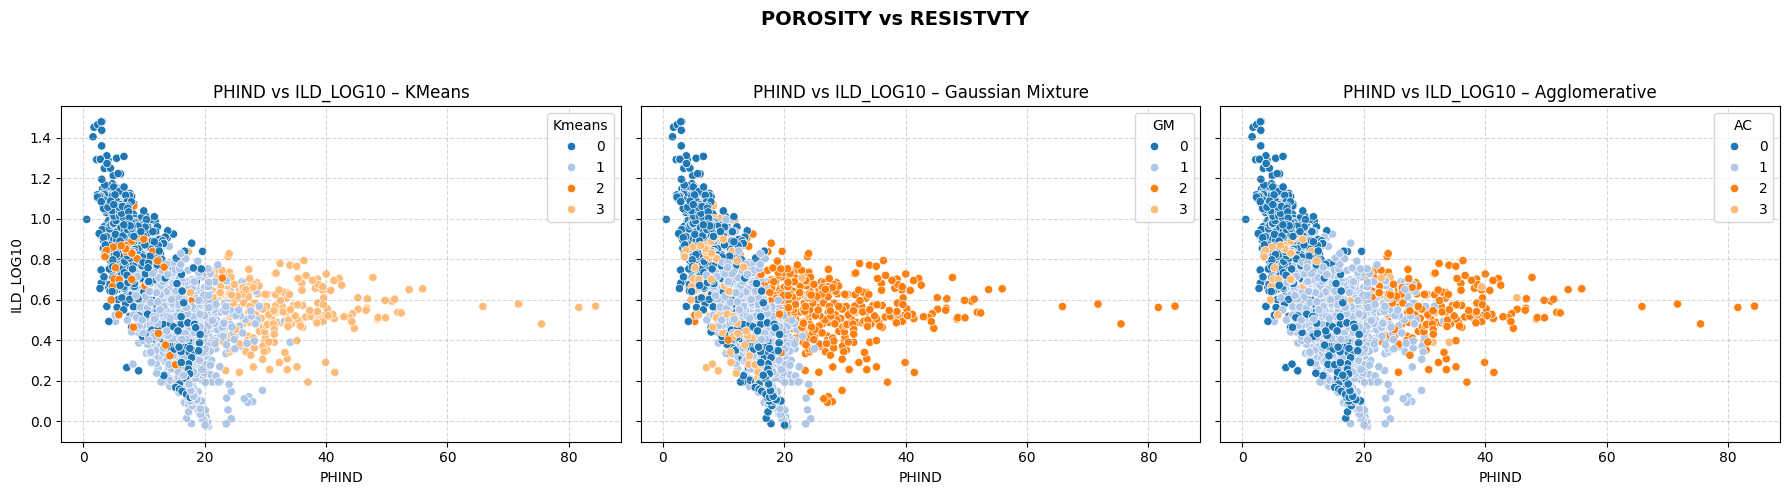

In [103]:
# =================================================
# CREATE ONE FIGURE WITH 3 SUBPLOTS
# =================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('POROSITY vs RESISTVTY', fontsize=14, fontweight='bold')

# =================================================
# KODE 1 – KMEANS
# =================================================
sns.scatterplot(data=data,x=PHIND,y=ILD_log10,palette="tab20",hue=data['Kmeans'],ax=axes[0])
axes[0].set_title('PHIND vs ILD_LOG10 – KMeans')
axes[0].set_xlabel('PHIND')
axes[0].set_ylabel('ILD_LOG10')
axes[0].grid(True, linestyle='--', alpha=0.5)

# =================================================
# KODE 2 – GAUSSIAN MIXTURE
# =================================================
sns.scatterplot(data=data,x=PHIND,y=ILD_log10,palette="tab20",hue=data['GM'],ax=axes[1])
axes[1].set_title('PHIND vs ILD_LOG10 – Gaussian Mixture')
axes[1].set_xlabel('PHIND')
axes[1].set_ylabel('ILD_LOG10')
axes[1].grid(True, linestyle='--', alpha=0.5)

# =================================================
# KODE 3 – AGGLOMERATIVE CLUSTERING
# =================================================
sns.scatterplot(data=data,x=PHIND,y=ILD_log10,palette="tab20",hue=data['AC'],ax=axes[2])
axes[2].set_title('PHIND vs ILD_LOG10 – Agglomerative')
axes[2].set_xlabel('PHIND')
axes[2].set_ylabel('ILD_LOG10')
axes[2].grid(True, linestyle='--', alpha=0.5)

# =================================================
# FINAL LAYOUT
# =================================================
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

** Deskripsi dan Kesimpulan **
1. K-Means (PHIND vs ILD_log10)
Karakteristik:

K-Means menghasilkan pemisahan cluster yang tegas dan jelas berdasarkan jarak ke centroid. Distribusi data tersegmentasi secara geometris dengan batas antar cluster yang relatif kaku.

Interpretasi:

Cluster dengan porositas rendah (PHIND rendah) dan resistivitas relatif tinggi diinterpretasikan sebagai batuan kompak atau shale. Cluster dengan porositas menengah hingga tinggi dan resistivitas rendah merepresentasikan water-bearing sand, sedangkan porositas menengah–tinggi dengan resistivitas relatif lebih tinggi diinterpretasikan sebagai zona reservoir berpotensi hidrokarbon. Meskipun pemisahan terlihat jelas, K-Means cenderung menyederhanakan variasi fluida dan zona transisi antara water sand dan hydrocarbon sand.

2. Gaussian Mixture Model (GMM) (PHIND vs ILD_log10)
Karakteristik:

GMM menghasilkan clustering probabilistik dengan batas antar cluster yang lebih halus dan saling tumpang tindih, sehingga lebih fleksibel dalam menangani sebaran data.

Interpretasi:

Model ini lebih mampu merepresentasikan overlap alami antara water sand dan hydrocarbon sand pada data porositas–resistivitas. Cluster dengan porositas menengah hingga tinggi dan resistivitas menengah–tinggi diidentifikasi sebagai zona reservoir potensial, sementara zona dengan resistivitas lebih rendah menunjukkan pengaruh fluida air. GMM memberikan gambaran yang lebih realistis secara petrofisika, terutama pada interval dengan perubahan fluida yang bertahap.

3. Agglomerative Clustering (PHIND vs ILD_log10)
Karakteristik:

Agglomerative Clustering membentuk cluster secara hierarkis, berdasarkan kemiripan antar data point, dan hasilnya bergantung pada tingkat pemotongan dendrogram.

Interpretasi:

Metode ini menggambarkan gradasi kualitas reservoir dari batuan berporositas rendah hingga tinggi secara bertahap. Namun, batas antar cluster sangat dipengaruhi oleh jumlah cluster yang dipilih, sehingga interpretasi akhir memerlukan kalibrasi geologis agar tidak bersifat subjektif.

Agglomerative Clustering (PHIND vs ILD_log10)
Karakteristik:

Agglomerative Clustering membentuk cluster secara hierarkis, berdasarkan kemiripan antar data point, dan hasilnya bergantung pada tingkat pemotongan dendrogram.

Interpretasi:

Metode ini menggambarkan gradasi kualitas reservoir dari batuan berporositas rendah hingga tinggi secara bertahap. Namun, batas antar cluster sangat dipengaruhi oleh jumlah cluster yang dipilih, sehingga interpretasi akhir memerlukan kalibrasi geologis agar tidak bersifat subjektif.

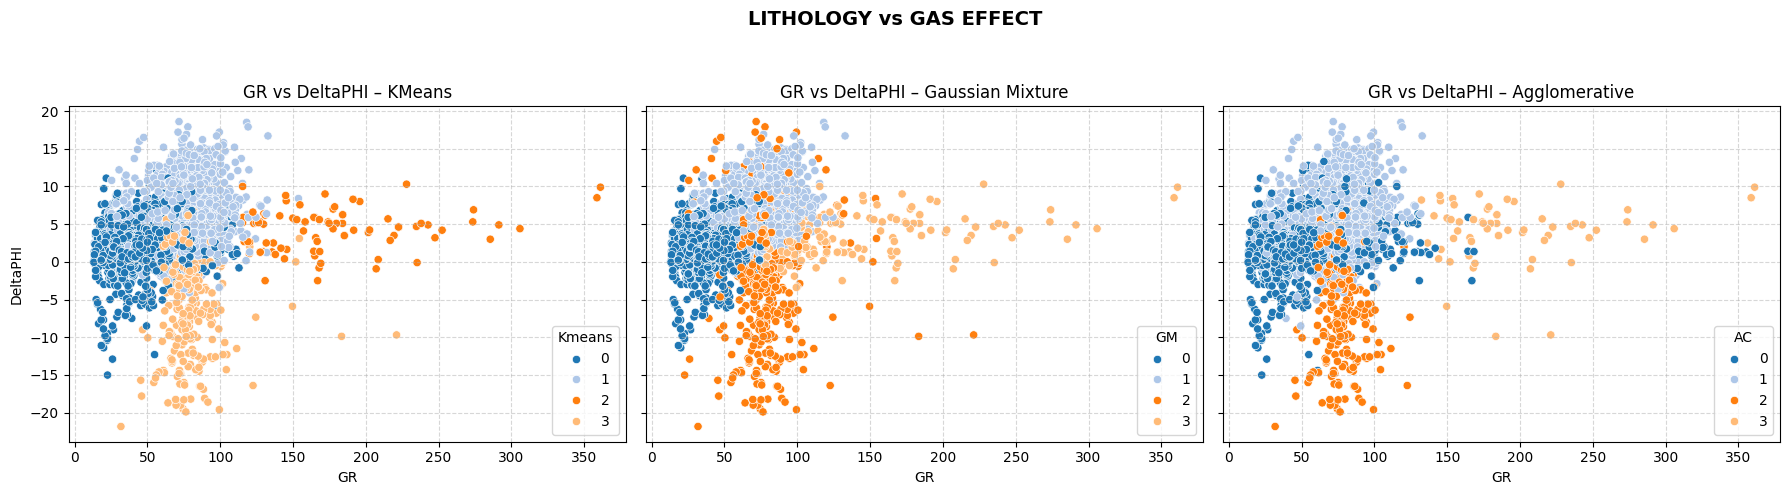

In [102]:
# =================================================
# CREATE ONE FIGURE WITH 3 SUBPLOTS
# =================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('LITHOLOGY vs GAS EFFECT', fontsize=14, fontweight='bold')

# =================================================
# KODE 1 – KMEANS
# =================================================
sns.scatterplot(data=data,x=GR,y=DeltaPHI,palette="tab20",hue=data['Kmeans'],ax=axes[0])
axes[0].set_title('GR vs DeltaPHI – KMeans')
axes[0].set_xlabel('GR')
axes[0].set_ylabel('DeltaPHI')
axes[0].grid(True, linestyle='--', alpha=0.5)

# =================================================
# KODE 2 – GAUSSIAN MIXTURE
# =================================================
sns.scatterplot(data=data,x=GR,y=DeltaPHI,palette="tab20",hue=data['GM'],ax=axes[1])
axes[1].set_title('GR vs DeltaPHI – Gaussian Mixture')
axes[1].set_xlabel('GR')
axes[1].set_ylabel('DeltaPHI')
axes[1].grid(True, linestyle='--', alpha=0.5)

# =================================================
# KODE 3 – AGGLOMERATIVE CLUSTERING
# =================================================
sns.scatterplot(data=data,x=GR,y=DeltaPHI,palette="tab20",hue=data['AC'],ax=axes[2])
axes[2].set_title('GR vs DeltaPHI – Agglomerative')
axes[2].set_xlabel('GR')
axes[2].set_ylabel('DeltaPHI')
axes[2].grid(True, linestyle='--', alpha=0.5)

# =================================================
# FINAL LAYOUT
# =================================================
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

** DESKRPISI **
1. K-Means (GR vs DeltaPHI)
Karakteristik:

K-Means menghasilkan pemisahan cluster yang tegas dan jelas berdasarkan jarak ke centroid. Distribusi data tersegmentasi secara geometris dengan batas antar cluster yang relatif kaku, terutama pada domain Gamma Ray rendah.

Interpretasi:

Cluster dengan GR rendah dan DeltaPHI mendekati nol hingga positif diinterpretasikan sebagai zona reservoir bersih (pasir) dengan porositas efektif dan kemungkinan fluida hidrokarbon. Cluster dengan GR rendah dan DeltaPHI negatif yang besar menunjukkan indikasi gas akibat neutron–density crossover. Sementara itu, cluster dengan GR tinggi merepresentasikan zona shale yang bersifat non-reservoir. Meskipun visualisasi terlihat jelas, K-Means cenderung menyederhanakan heterogenitas dan kurang menangkap zona transisi litologi dan gas effect yang bersifat gradual.
2. Gaussian Mixture Model (GMM) (GR vs DeltaPHI)
Karakteristik:

GMM menghasilkan clustering probabilistik dengan batas antar cluster yang lebih halus dan saling tumpang tindih, sehingga lebih fleksibel dalam menangani sebaran data yang kompleks.

Interpretasi:

Model ini lebih mampu merepresentasikan overlap alami antara pasir bersih, shaly sand, dan zona berindikasi gas pada data GR–DeltaPHI. Cluster dengan GR menengah dan DeltaPHI positif diidentifikasi sebagai zona reservoir potensial dengan indikasi gas, mencerminkan kondisi geologi yang lebih realistis. GMM sangat sesuai untuk data petrofisika yang kontinu dan memiliki transisi fasies yang bertahap.

3. Agglomerative Clustering (GR vs DeltaPHI)
Karakteristik:

Agglomerative Clustering membentuk cluster secara hierarkis, berdasarkan kemiripan antar data point, dengan hasil yang bergantung pada tingkat pemotongan dendrogram.

Interpretasi:

Metode ini menggambarkan transisi litologi dan gas effect secara bertahap, mulai dari shale, shaly sand, hingga pasir berindikasi gas. Namun, batas antar cluster sangat dipengaruhi oleh jumlah cluster yang dipilih, sehingga interpretasi akhir memerlukan kalibrasi geologis agar tidak bersifat subjektif.

Kesimpulan

K-Means: Memberikan pemisahan yang paling jelas dan mudah dipahami pada crossplot GR–DeltaPHI, cocok untuk eksplorasi awal litologi dan gas effect, tetapi kurang merepresentasikan overlap dan transisi alami.

Gaussian Mixture Model (GMM): Paling representatif secara petrofisika karena mampu menangkap overlap fasies dan ketidakpastian gas effect, sehingga paling realistis untuk interpretasi geologi.

Agglomerative Clustering: Berguna untuk memahami struktur dan transisi data secara hierarkis, namun sensitif terhadap pemilihan parameter clustering.

Secara keseluruhan, untuk interpretasi hubungan litologi dan gas effect pada lingkungan reservoir yang heterogen, Gaussian Mixture Model (GMM) merupakan metode yang paling unggul, sementara K-Means efektif untuk visualisasi awal dan Agglomerative Clustering berperan sebagai pendukung analisis struktur data.

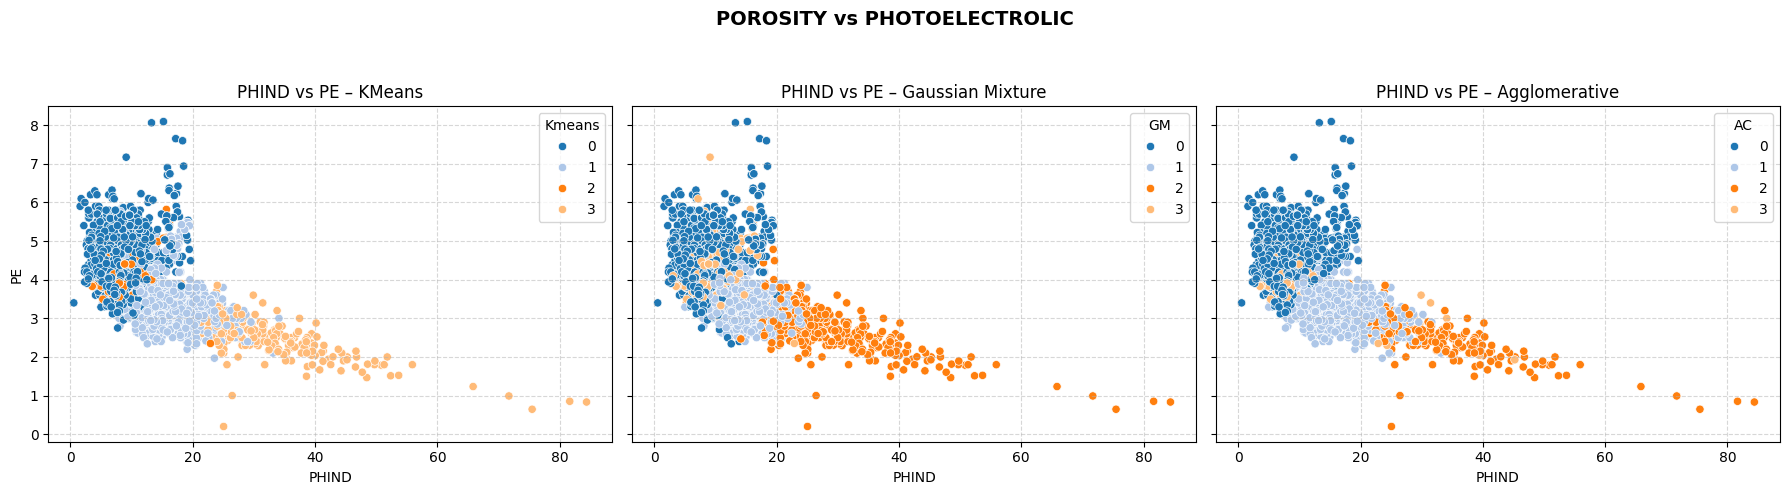

In [101]:
# =================================================
# CREATE ONE FIGURE WITH 3 SUBPLOTS
# =================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('POROSITY vs PHOTOELECTROLIC', fontsize=14, fontweight='bold')

# =================================================
# KODE 1 – KMEANS
# =================================================
sns.scatterplot(data=data,x=PHIND,y=PE,palette="tab20",hue=data['Kmeans'],ax=axes[0])
axes[0].set_title('PHIND vs PE – KMeans')
axes[0].set_xlabel('PHIND')
axes[0].set_ylabel('PE')
axes[0].grid(True, linestyle='--', alpha=0.5)

# =================================================
# KODE 2 – GAUSSIAN MIXTURE
# =================================================
sns.scatterplot(data=data,x=PHIND,y=PE,palette="tab20",hue=data['GM'],ax=axes[1])
axes[1].set_title('PHIND vs PE – Gaussian Mixture')
axes[1].set_xlabel('PHIND')
axes[1].set_ylabel('PE')
axes[1].grid(True, linestyle='--', alpha=0.5)

# =================================================
# KODE 3 – AGGLOMERATIVE CLUSTERING
# =================================================
sns.scatterplot(data=data,x=PHIND,y=PE,palette="tab20",hue=data['AC'],ax=axes[2])
axes[2].set_title('PHIND vs PE – Agglomerative')
axes[2].set_xlabel('PHIND')
axes[2].set_ylabel('PE')
axes[2].grid(True, linestyle='--', alpha=0.5)

# =================================================
# FINAL LAYOUT
# =================================================
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

** DESKRPISI **
1. K-Means (PHIND vs PE)
Karakteristik:

K-Means menghasilkan pemisahan cluster yang tegas dan jelas berdasarkan jarak ke centroid. Distribusi data tersegmentasi secara geometris dengan batas antar cluster yang relatif kaku, terutama pada domain porositas rendah hingga menengah.

Interpretasi:

Cluster dengan PHIND rendah dan nilai PE relatif tinggi diinterpretasikan sebagai batuan kompak atau shale, yang umumnya memiliki kandungan mineral berat lebih tinggi. Cluster dengan PHIND menengah hingga tinggi dan nilai PE rendah hingga menengah merepresentasikan batuan reservoir berporositas baik, seperti sandstone atau carbonate bersih. Meskipun pemisahan terlihat jelas, K-Means cenderung menyederhanakan variasi mineralogi dan kurang menangkap zona transisi antara shale, shaly sand, dan clean reservoir.
2. K-Means (PHIND vs PE)
Karakteristik:

K-Means menghasilkan pemisahan cluster yang tegas dan jelas berdasarkan jarak ke centroid. Distribusi data tersegmentasi secara geometris dengan batas antar cluster yang relatif kaku, terutama pada domain porositas rendah hingga menengah.

Interpretasi:

Cluster dengan PHIND rendah dan nilai PE relatif tinggi diinterpretasikan sebagai batuan kompak atau shale, yang umumnya memiliki kandungan mineral berat lebih tinggi. Cluster dengan PHIND menengah hingga tinggi dan nilai PE rendah hingga menengah merepresentasikan batuan reservoir berporositas baik, seperti sandstone atau carbonate bersih. Meskipun pemisahan terlihat jelas, K-Means cenderung menyederhanakan variasi mineralogi dan kurang menangkap zona transisi antara shale, shaly sand, dan clean reservoir.

3. Agglomerative Clustering (PHIND vs PE)
Karakteristik:

Agglomerative Clustering membentuk cluster secara hierarkis, berdasarkan kemiripan antar data point, dengan hasil yang bergantung pada tingkat pemotongan dendrogram.

Interpretasi:

Metode ini menggambarkan gradasi litologi dan mineralogi secara bertahap, mulai dari batuan kompak ber-PE tinggi hingga reservoir berporositas baik dan PE rendah. Namun, batas antar cluster sangat dipengaruhi oleh jumlah cluster yang dipilih, sehingga interpretasi akhir memerlukan kalibrasi geologis agar tidak bersifat subjektif.

Kesimpulan

K-Means: Memberikan pemisahan yang paling jelas dan mudah dipahami, cocok untuk eksplorasi awal hubungan porositas–mineralogi, tetapi kurang merepresentasikan transisi litologi yang kompleks.

Gaussian Mixture Model (GMM): Paling representatif secara petrofisika karena mampu menangkap overlap dan ketidakpastian mineralogi, sehingga paling realistis untuk interpretasi reservoir.

Agglomerative Clustering: Berguna untuk memahami struktur dan gradasi litologi secara hierarkis, namun sensitif terhadap pemilihan parameter clustering.

Secara keseluruhan, untuk interpretasi hubungan porositas dan photoelectric pada lingkungan reservoir yang heterogen, Gaussian Mixture Model (GMM) merupakan metode yang paling unggul, sementara K-Means efektif untuk visualisasi awal dan Agglomerative Clustering berfungsi sebagai pendukung analisis struktur data.